In [1]:
import frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Measure Frustration of Complete PDB

In [2]:
structure=frustratometer.Structure.full_pdb('./data/1r69.pdb',"A")
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=9.5)

@> 518 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 518 atoms and 1 coordinate set(s) were parsed in 0.01s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


In [3]:
print(AWSEM_model.native_energy())

-260.22832170330156


### Single Residue Frustration

Text(0.5, 0, 'Residue i')

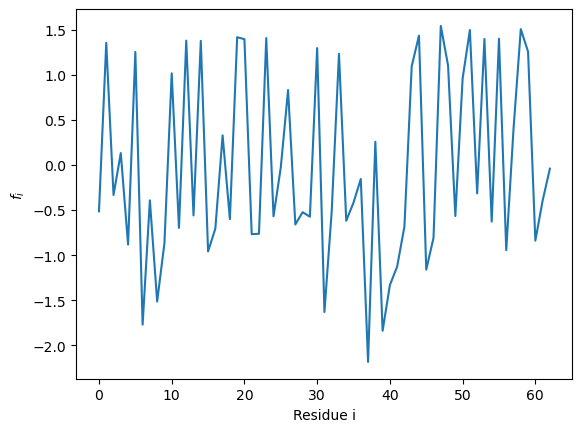

In [4]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))
plt.ylabel("$f_{i}$"); plt.xlabel("Residue i")

In [5]:
AWSEM_model.view_single_frustration(structure)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

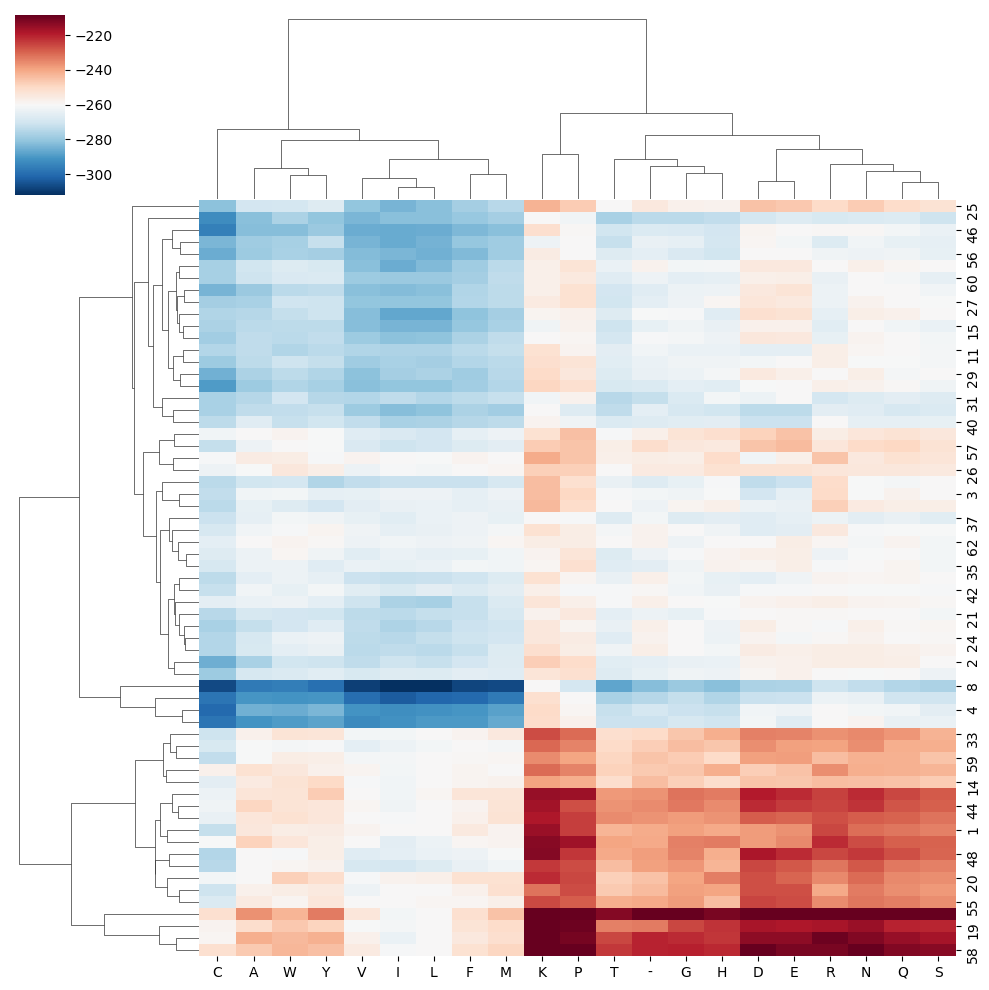

In [6]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

In [7]:
AWSEM_model.generate_frustration_pair_distribution(kind="singleresidue")

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        3.98554539, 8.07426787, 6.46808968, 3.6675188 , 2.71888969,
        2.58987275, 1.48072645, 1.92581327, 4.1206761 , 2.47982934,
        1.17595675, 1.31554135, 1.30267085, 1.17883576, 0.87697199,
        0.44491013, 0.73420493, 0.75061631, 0.27718284, 0.44918661,
        0.05959179, 0.22194801, 0.15537651, 0.24227235]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 4.65823146, 3.7315902 , 0.        , 0.        ,
        6.47468187, 1.85090806, 0.        , 1.40477594, 2.47982934,
        1.10245946, 1.97331202, 0.        , 0.        , 1.46161999,
        1.3347304 , 1.83551231, 0.56296223, 1.03943566, 0.48127136,
        0.44693845, 0.41615251, 0.38844128, 0.36340852]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        2.98383077, 3.48744602, 2.04871619, 1.52540889, 2.54441548,
        0.64631405, 1.01618482, 1.04128941, 1.40227189, 1.05204881,


<AxesSubplot: >

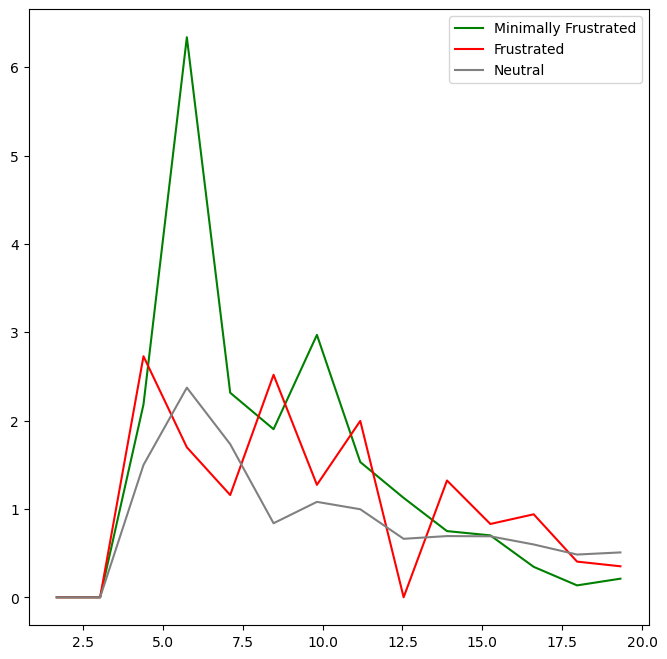

In [8]:
single_residue_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="singleresidue",bins=15)

plt.figure(figsize=(8,8))

sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[2],label="Neutral",color="gray")

### Mutational Frustration

In [9]:
AWSEM_model.view_pair_frustration(pair="mutational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<AxesSubplot: >

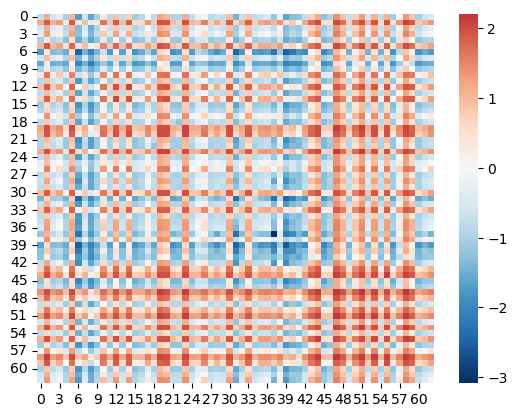

In [10]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

<AxesSubplot: >

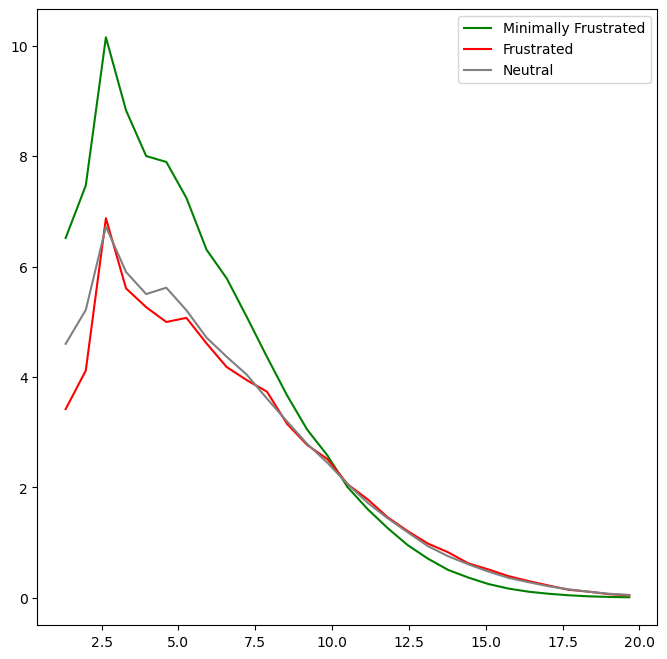

In [11]:
mutational_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="mutational")

plt.figure(figsize=(8,8))

sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[2],label="Neutral",color="gray")

### Configurational Frustration

In [12]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<AxesSubplot: >

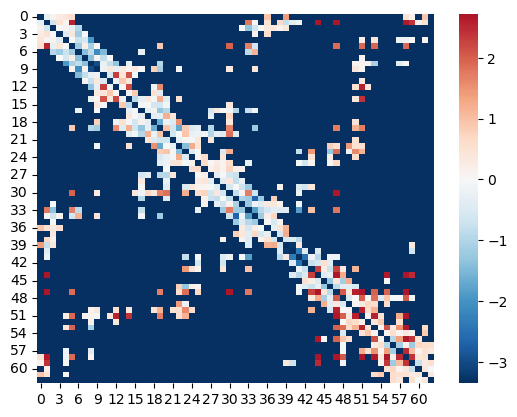

In [13]:
sns.heatmap(AWSEM_model.frustration(kind='configurational'),cmap='RdBu_r',center=0)

<AxesSubplot: >

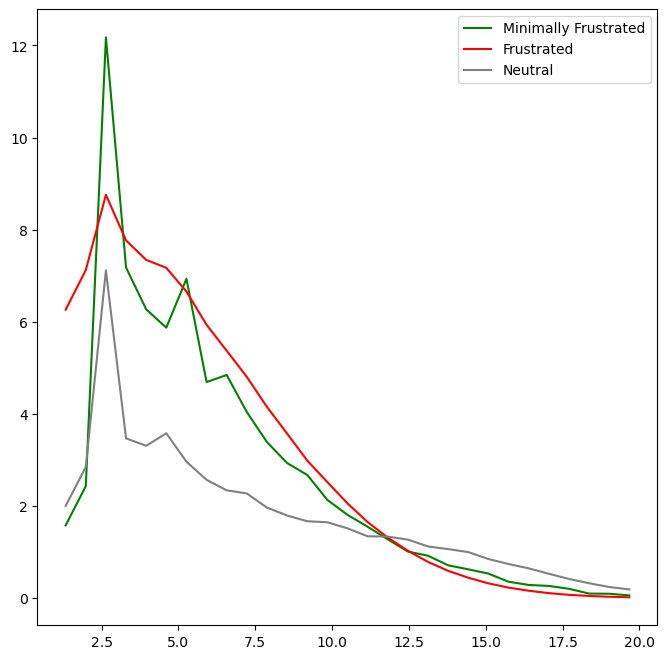

In [14]:
configurational_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="configurational")

plt.figure(figsize=(8,8))

sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[2],label="Neutral",color="gray")

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [15]:
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")

#Burial energy of segment is measured in context of remainder of protein.
AWSEM_model_burial_context_included=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_contact=10,distance_cutoff_contact=10)

#Burial energy of segment is NOT measured in context of remainder of protein.
AWSEM_model=frustratometer.AWSEM(structure,distance_cutoff_contact=10,k_electrostatics=0.0,min_sequence_separation_contact=10,burial_in_context=False)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm8/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  warnings.warn(
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]
[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


In [16]:
AWSEM_model_burial_context_included.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
AWSEM_model.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/frustratometer/frustration/frustration.py:716: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
AWSEM_model.view_pair_frustration(pair="mutational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Cytochrome C (PDB: 1CYC)

In [22]:
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",repair_pdb=True, seq_selection="resindex `0to50`")

#Burial energy of segment is measured in context of remainder of protein.
AWSEM_model_burial_context_included=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_contact=10,distance_cutoff_contact=10)

#Burial energy of segment is NOT measured in context of remainder of protein.
AWSEM_model=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_contact=10,distance_cutoff_contact=10,burial_in_context=False)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm8/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  warnings.warn(
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]
[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


In [23]:
AWSEM_model_burial_context_included.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
AWSEM_model.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/frustratometer/frustration/frustration.py:716: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [26]:
AWSEM_model.view_pair_frustration(pair="mutational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [27]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [28]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.